In [ ]:
# Ancient Mesopotamia georeferencing
# Author: Kelsey McCornack
# Date: 5/3/2023
# Description: Extracting coordinates for ancient Mesopotamian cities based on .jpg maps

In [1]:
# Import packages and set working directory
from PIL import Image
from math import sqrt
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Set working directory and load image
%cd C:/Users/kmcco/OneDrive/Desktop/DataScienceSelfStudy/Mesopotamia

# Image credit: Paul Kriwaczek. Babylon: Mesopotamia and the Birth of Civilization
map_image = Image.open('Empire of Akkad.jpg')
map_image.show()

C:\Users\kmcco\OneDrive\Desktop\DataScienceSelfStudy\Mesopotamia


In [20]:
# Convert image to a numpy array
map_arr = np.array(map_image)

# Define colors for Ur (red), Ebla (blue), and Urkesh (green) points on map. 
red_lower = np.array([150, 0, 0])
red_upper = np.array([255, 50, 50])

green_lower = np.array([0, 150, 0])
green_upper = np.array([50, 255, 50])

blue_lower = np.array([0, 0, 150])
blue_upper = np.array([50, 50, 255])

In [21]:
# Create a binary masks for the red, blue, and green pixels in the image
red_mask = cv2.inRange(map_arr, red_lower, red_upper)
green_mask = cv2.inRange(map_arr, green_lower, green_upper)
blue_mask = cv2.inRange(map_arr, blue_lower, blue_upper)

In [22]:
# check to make sure the rgb values are correct
img = Image.new('RGB', (100, 100), (0, 255, 0))
img.show()

In [23]:
# Find the centroid of the binary masks
red_centroid = cv2.moments(red_mask)
red_centroid_x = int(red_centroid["m10"] / red_centroid["m00"])
red_centroid_y = int(red_centroid["m01"] / red_centroid["m00"])

green_centroid = cv2.moments(green_mask)
green_centroid_x = int(green_centroid["m10"] / green_centroid["m00"])
green_centroid_y = int(green_centroid["m01"] / green_centroid["m00"])

blue_centroid = cv2.moments(blue_mask)
blue_centroid_x = int(blue_centroid["m10"] / blue_centroid["m00"])
blue_centroid_y = int(blue_centroid["m01"] / blue_centroid["m00"])

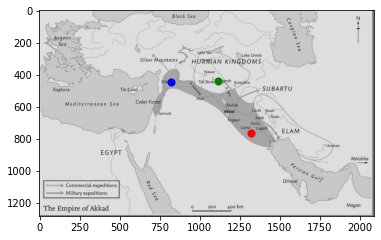

{818}

In [27]:
# Display the original image with a circle around the detected red dot
plt.imshow(map_image)
plt.scatter(blue_centroid_x, blue_centroid_y, c='b', s=50)
plt.scatter(red_centroid_x, red_centroid_y, c='r', s=50)
plt.scatter(green_centroid_x, green_centroid_y, c='g', s=50)
plt.show()

# The variables centroid_x and centroid_y now contain the pixel coordinates of the red dot
# print(f"Pixel coordinates of the red dot: ({centroid_x}, {centroid_y})")
({blue_centroid_x})

In [29]:
# Reference points with known coordinates (pixel coordinates, latitude, longitude)
# long/lat retrieved from https://latitude.to/ and Google Maps.
ref_points = [(red_centroid_x, red_centroid_y, 30.95749617, 46.101832926),
              (green_centroid_x, green_centroid_y, 37.05416645, 40.9916627),
              (blue_centroid_x, blue_centroid_y, 35.79889744235155, 36.79888304981576)]

In [ ]:
# To do:
# Do the actual georeferencing using the defined pixel/actual coordinate combos.
# Make function so this can be done with other maps